# Challenge Set 1
Topic:        Explore MTA turnstile data

Date:         10/03/2016

Name:         Veena Kumar

Worked with:  N/A


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

# Challenge 1.1

In [2]:
#Read in the data.
df = pd.read_csv(open('turnstile_all.csv'))
df.columns = df.columns.str.strip() #strip out white spaces

In [3]:
df.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS'],
      dtype='object')

In [4]:
df.DATE.value_counts().sort_index()

07/30/2016    27253
07/31/2016    27200
08/01/2016    28611
08/02/2016    27803
08/03/2016    27249
08/04/2016    27917
08/05/2016    27354
08/06/2016    27348
08/07/2016    27258
08/08/2016    27797
08/09/2016    28044
08/10/2016    27483
08/11/2016    27885
08/12/2016    27407
08/13/2016    27262
08/14/2016    27188
08/15/2016    27299
08/16/2016    27296
08/17/2016    27200
08/18/2016    27149
08/19/2016    27146
08/20/2016    27270
08/21/2016    27665
08/22/2016    27369
08/23/2016    27311
08/24/2016    27341
08/25/2016    27398
08/26/2016    27258
Name: DATE, dtype: int64

# Challenge 1.2

In [5]:
#Turn data into a time series.
from datetime import datetime as dt

In [6]:
df['Date_Time'] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

In [7]:
df.groupby(["C/A", "UNIT", "SCP", "STATION", "Date_Time"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,Date_Time,ENTRIES
361225,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-09 16:00:00,2
361223,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-09 08:00:00,2
361226,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-09 20:00:00,2
361227,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-10 00:00:00,2
749050,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 12:00:00,2
749049,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 08:00:00,2
361228,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-08-10 04:00:00,2
749047,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 00:00:00,2
749046,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 20:00:00,2
749045,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 16:00:00,2


In [8]:
df.DESC.value_counts()

REGULAR       765667
RECOVR AUD      3094
Name: DESC, dtype: int64

In [9]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "Date_Time"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "Date_Time"], inplace=True)

In [10]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "Date_Time"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,Date_Time,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-07-30 00:00:00,1
512480,R154,R116,00-03-00,50 ST,2016-08-02 12:00:00,1
512471,R154,R116,00-03-00,50 ST,2016-08-01 00:00:00,1
512472,R154,R116,00-03-00,50 ST,2016-08-01 04:00:00,1
512473,R154,R116,00-03-00,50 ST,2016-08-01 08:00:00,1


In [11]:
#drop columns we don't need anymore. 
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

# Challenge 1.3

In [12]:
#Calculate entries.
df_daily = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [13]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,07/30/2016,5761524
1,A002,R051,02-00-00,59 ST,07/31/2016,5762275
2,A002,R051,02-00-00,59 ST,08/01/2016,5763874
3,A002,R051,02-00-00,59 ST,08/02/2016,5765542
4,A002,R051,02-00-00,59 ST,08/03/2016,5767231


In [14]:
#create 2 new columns for the previous entry's date and entries, and then shift the column values by one.
df_daily[["PREV_DATE", "PREV_ENTRIES"]] = (df_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [15]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,07/30/2016,5761524,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/31/2016,5762275,07/30/2016,5761524.0
2,A002,R051,02-00-00,59 ST,08/01/2016,5763874,07/31/2016,5762275.0
3,A002,R051,02-00-00,59 ST,08/02/2016,5765542,08/01/2016,5763874.0
4,A002,R051,02-00-00,59 ST,08/03/2016,5767231,08/02/2016,5765542.0


In [16]:
# Drop the rows for last date
df_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [17]:
#shows values where entries are less than previous entries, which is the opp of what we want.
df_daily[df_daily["ENTRIES"] < df_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
953,A011,R080,01-00-00,57 ST-7 AV,07/31/2016,887759276,07/30/2016,887760860.0
954,A011,R080,01-00-00,57 ST-7 AV,08/01/2016,887756644,07/31/2016,887759276.0
955,A011,R080,01-00-00,57 ST-7 AV,08/02/2016,887753767,08/01/2016,887756644.0
956,A011,R080,01-00-00,57 ST-7 AV,08/03/2016,887750712,08/02/2016,887753767.0
957,A011,R080,01-00-00,57 ST-7 AV,08/04/2016,887747773,08/03/2016,887750712.0


In [18]:
#to find how many entries have this reverse entry problem.
(df_daily[df_daily["ENTRIES"] < df_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         27
             01-00-04  57 ST-7 AV         23
             01-00-05  57 ST-7 AV         25
A016   R081  03-06-01  49 ST               1
A025   R023  01-03-02  34 ST-HERALD SQ    27
A037   R170  05-00-00  14 ST-UNION SQ      1
A046   R463  00-03-00  CANAL ST            1
A049   R088  02-05-00  CORTLANDT ST       13
A066   R118  00-00-00  CANAL ST           27
B021   R228  00-03-01  AVENUE J            1
B022   R229  00-05-00  AVENUE M            1
B026   R230  00-06-00  NECK RD             1
B032   R264  00-00-00  OCEAN PKWY          3
C019   R232  00-00-02  45 ST              27
H003   R163  01-00-02  6 AV               27
H023   R236  00-06-00  DEKALB AV          27
H041   R152  00-06-00  CANARSIE-ROCKAW     1
J034   R007  00-00-02  104 ST             27
JFK02  R535  01-00-01  HOWARD BCH JFK      1
K026   R100  00-00-01  METROPOLITAN AV    27
N001   R173  01-06-03  INWOOD-207 ST       1
N039   R251  01-

In [19]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

_ = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

(67108908, 134233317.0)
(5240, 289364352.0)
(615, 8026931.0)
(1378, 4378079.0)
(67109291, 777905.0)
(150994947, 857.0)
(488742, 117478711.0)
(685, 101300823.0)
(1933, 7838093.0)
(4198, 4261918.0)
(67108951, 17902357.0)
(69, 2947006.0)
(2666, 1440607.0)
(3115, 2765638.0)
(1332, 10020638.0)
(98129, 3736809.0)
(3739533, 98129.0)
(783138, 2711052.0)
(2712030, 783138.0)
(1579, 2743817.0)
(2452, 1663471.0)
(1346, 592613464.0)
(2845, 2107374.0)
(494, 1309521.0)
(67109113, 133560.0)
(134218229, 235676.0)
(4125, 10647798.0)


In [20]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

(67108908, 134233317.0)
(5240, 289364352.0)
(615, 8026931.0)
(1378, 4378079.0)
(67109291, 777905.0)
(150994947, 857.0)
(488742, 117478711.0)
(685, 101300823.0)
(1933, 7838093.0)
(4198, 4261918.0)
(67108951, 17902357.0)
(69, 2947006.0)
(2666, 1440607.0)
(3115, 2765638.0)
(1332, 10020638.0)
(98129, 3736809.0)
(3739533, 98129.0)
(783138, 2711052.0)
(2712030, 783138.0)
(1579, 2743817.0)
(2452, 1663471.0)
(1346, 592613464.0)
(2845, 2107374.0)
(494, 1309521.0)
(67109113, 133560.0)
(134218229, 235676.0)
(4125, 10647798.0)


In [44]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,07/31/2016,5762275,07/30/2016,5761524.0,751.0
2,A002,R051,02-00-00,59 ST,08/01/2016,5763874,07/31/2016,5762275.0,1599.0
3,A002,R051,02-00-00,59 ST,08/02/2016,5765542,08/01/2016,5763874.0,1668.0
4,A002,R051,02-00-00,59 ST,08/03/2016,5767231,08/02/2016,5765542.0,1689.0
5,A002,R051,02-00-00,59 ST,08/04/2016,5768926,08/03/2016,5767231.0,1695.0
6,A002,R051,02-00-00,59 ST,08/05/2016,5770554,08/04/2016,5768926.0,1628.0
7,A002,R051,02-00-00,59 ST,08/06/2016,5771533,08/05/2016,5770554.0,979.0
8,A002,R051,02-00-00,59 ST,08/07/2016,5772273,08/06/2016,5771533.0,740.0
9,A002,R051,02-00-00,59 ST,08/08/2016,5773743,08/07/2016,5772273.0,1470.0
10,A002,R051,02-00-00,59 ST,08/09/2016,5775422,08/08/2016,5773743.0,1679.0


# Challenge 1.4

In [33]:
df_daily_plot = df_daily[['DATE','DAILY_ENTRIES']]

In [40]:
df_dates = df_daily_plot.groupby('DATE').sum()

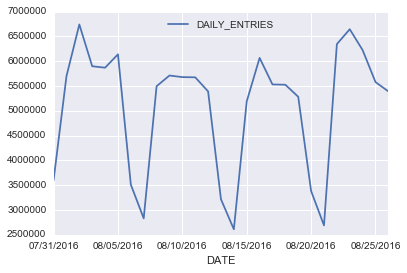

In [43]:
#Plot of total daily entries
df_dates.plot()

# Challenge 1.5

In [45]:
#Viewing how the data is currently sorted.
df_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,07/31/2016,5762275,07/30/2016,5761524.0,751.0
2,A002,R051,02-00-00,59 ST,08/01/2016,5763874,07/31/2016,5762275.0,1599.0
3,A002,R051,02-00-00,59 ST,08/02/2016,5765542,08/01/2016,5763874.0,1668.0
4,A002,R051,02-00-00,59 ST,08/03/2016,5767231,08/02/2016,5765542.0,1689.0
5,A002,R051,02-00-00,59 ST,08/04/2016,5768926,08/03/2016,5767231.0,1695.0
6,A002,R051,02-00-00,59 ST,08/05/2016,5770554,08/04/2016,5768926.0,1628.0
7,A002,R051,02-00-00,59 ST,08/06/2016,5771533,08/05/2016,5770554.0,979.0
8,A002,R051,02-00-00,59 ST,08/07/2016,5772273,08/06/2016,5771533.0,740.0
9,A002,R051,02-00-00,59 ST,08/08/2016,5773743,08/07/2016,5772273.0,1470.0
10,A002,R051,02-00-00,59 ST,08/09/2016,5775422,08/08/2016,5773743.0,1679.0


In [54]:
#Sorting the data so that it is first grouped by date, then C/A, Unit, and Station. Then list
#the sum of all the entries from all the turnstiles for that C/A/Unit/Station combo for 
#each date.
df_turnstile = df_daily.groupby(['DATE','C/A','UNIT','STATION'])['DAILY_ENTRIES'].sum()

In [59]:
df_turnstile.head()

DATE        C/A   UNIT  STATION   
07/31/2016  A002  R051  59 ST         7965.0
            A006  R079  5 AV/59 ST    6012.0
            A007  R079  5 AV/59 ST    4024.0
            A010  R080  57 ST-7 AV    8706.0
            A011  R080  57 ST-7 AV    6235.0
Name: DAILY_ENTRIES, dtype: float64

# Challenge 1.6

In [69]:
df_station = df_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()

In [70]:
#Total entries for each station.
df_station

STATION
1 AV                498885.0
103 ST              713814.0
103 ST-CORONA       487208.0
104 ST              104396.0
110 ST              270430.0
111 ST              386530.0
116 ST              806025.0
116 ST-COLUMBIA     274644.0
121 ST               59623.0
125 ST             1855423.0
135 ST              478377.0
137 ST CITY COL     287265.0
138/GRAND CONC       78228.0
14 ST              1397839.0
14 ST-UNION SQ     2390291.0
145 ST              858712.0
149/GRAND CONC      277387.0
14TH STREET         185404.0
15 ST-PROSPECT      137614.0
155 ST              155121.0
157 ST              253500.0
161/YANKEE STAD     707056.0
163 ST-AMSTERDM     102465.0
167 ST              464851.0
168 ST              576655.0
169 ST              195909.0
170 ST              377658.0
174 ST              168507.0
174-175 STS         128226.0
175 ST              293572.0
                     ...    
SUTPHIN-ARCHER      596440.0
SUTTER AV            90754.0
SUTTER AV-RUTLD     201592.0
THIRTY

# Challenge 1.7

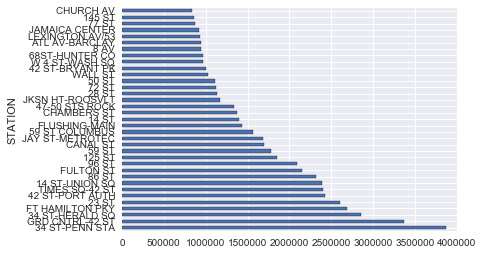

In [85]:
# df_station.plot()
# plt.xticks(rotation='vertical');
df_station.sort_values(ascending=False)[:35].plot.barh()

# Challenge 1.8

In [152]:


week_1 = {}
week_2 = {}
week_3 = {}
week_4 = {}

# days = ['Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday']
# week_1_dates = ['7/31/16','8/01/16','8/02/16','8/03/16','8/04/16','8/05/16','8/06/16']

# def week_by_week(week_dates,week_dict):
#     for i in range(len(week_dates)):
#         for day in days:
#             if day in week_dict:
#                 week_dict[days[i]] += df_daily['DAILY_ENTRIES']
#             else:
#                 week_dict[days[i]] = df_daily['DAILY_ENTRIES']
#     return week_dict


        

In [153]:
df_daily_totals = df_daily.groupby(['DATE'])['DAILY_ENTRIES'].sum()

In [154]:
df_week1 = df_daily_totals[:7]

In [155]:
df_week1

DATE
07/31/2016    3599209.0
08/01/2016    5695373.0
08/02/2016    6740586.0
08/03/2016    5898497.0
08/04/2016    5869233.0
08/05/2016    6138630.0
08/06/2016    3511274.0
Name: DAILY_ENTRIES, dtype: float64

In [156]:
days = ['1Wednesday','2Thursday','3Friday','4Saturday','5Sunday','6Monday','7Tuesday']
week_1_dates = ['7/31/16','8/01/16','8/02/16','8/03/16','8/04/16','8/05/16','8/06/16']

for i in range(len(week_1_dates)):
    week_1[days[i]] = df_week1.iloc[i]


In [157]:
week_1

{'1Wednesday': 3599209.0,
 '2Thursday': 5695373.0,
 '3Friday': 6740586.0,
 '4Saturday': 5898497.0,
 '5Sunday': 5869233.0,
 '6Monday': 6138630.0,
 '7Tuesday': 3511274.0}

In [158]:
df_week2 = df_daily_totals[7:14]

In [160]:
week_2_dates = ['8/07/16','8/08/16','8/09/16','8/10/16','8/11/16','8/12/16','8/13/16']

for i in range(len(week_2_dates)):
    week_2[days[i]] = df_week2.iloc[i]

In [161]:
week_2

{'1Wednesday': 2831388.0,
 '2Thursday': 5495658.0,
 '3Friday': 5711335.0,
 '4Saturday': 5679291.0,
 '5Sunday': 5675013.0,
 '6Monday': 5391507.0,
 '7Tuesday': 3215392.0}

In [165]:
df_week3 = df_daily_totals[14:21]

In [166]:
week_3_dates = ['8/14/16','8/15/16','8/16/16','8/17/16','8/18/16','8/19/16','8/20/16']

for i in range(len(week_3_dates)):
    week_3[days[i]] = df_week3.iloc[i]

In [167]:
week_3

{'1Wednesday': 2611608.0,
 '2Thursday': 5189711.0,
 '3Friday': 6066730.0,
 '4Saturday': 5531396.0,
 '5Sunday': 5525506.0,
 '6Monday': 5282368.0,
 '7Tuesday': 3381959.0}

In [172]:
df_week4 = df_daily_totals[21:28]

In [174]:
df_week4

DATE
08/21/2016    2690012.0
08/22/2016    6344679.0
08/23/2016    6644838.0
08/24/2016    6223693.0
08/25/2016    5579499.0
08/26/2016    5391036.0
Name: DAILY_ENTRIES, dtype: float64

In [175]:
week_4_dates = ['8/21/16','8/22/16','8/23/16','8/24/16','8/25/16','8/26/16']

for i in range(len(week_4_dates)):
    week_4[days[i]] = df_week4.iloc[i]

In [176]:
week_4

{'1Wednesday': 2690012.0,
 '2Thursday': 6344679.0,
 '3Friday': 6644838.0,
 '4Saturday': 6223693.0,
 '5Sunday': 5579499.0,
 '6Monday': 5391036.0}

In [196]:
week1_df = pd.DataFrame(week_1,index=[3])

In [197]:
week1_df

,1Wednesday,2Thursday,3Friday,4Saturday,5Sunday,6Monday,7Tuesday
3,3599209.0,5695373.0,6740586.0,5898497.0,5869233.0,6138630.0,3511274.0


In [203]:
week_1

{'1Wednesday': 3599209.0,
 '2Thursday': 5695373.0,
 '3Friday': 6740586.0,
 '4Saturday': 5898497.0,
 '5Sunday': 5869233.0,
 '6Monday': 6138630.0,
 '7Tuesday': 3511274.0}

In [206]:

dicts = [week_1,week_2,week_3,week_4]
# for key,value in week_2:
#     week_1[key] = week_1[key] + value

In [211]:
all_weeks = pd.DataFrame(dicts)

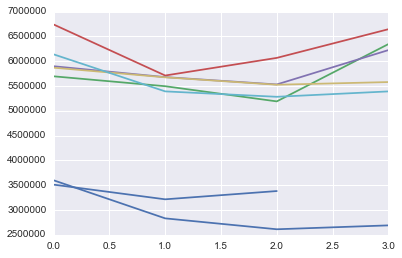

In [219]:
all_weeks.plot(legend=False)

In [221]:
all_weeks_other = all_weeks.transpose()

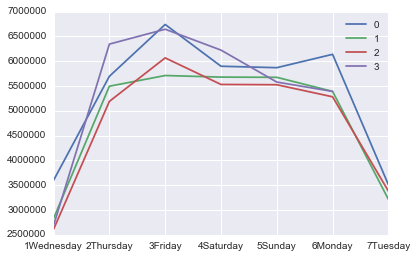

In [230]:
all_weeks_other.plot()

# Challenge 1.9

In [234]:
#Create a dataframe that is grouped by the total entries for that station for the 4 weeks.
top_stations = df_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()

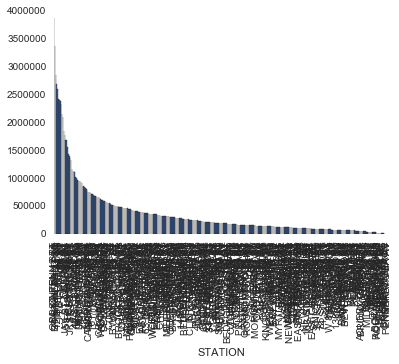

In [242]:
#Top 5 stations.
top_stations.sort_values(ascending=False).plot.bar()

# Challenge 1.10

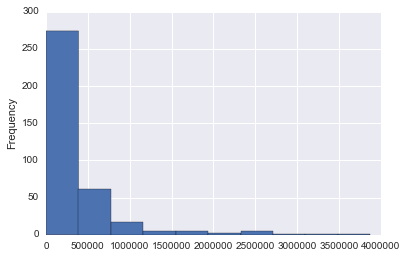

In [243]:
top_stations.plot.hist()